In [23]:
import pandas as pd 
import sidetable as stb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
pd.options.display.max_columns = None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

    La covarianza indica la dirección de la relación entre dos variables y la correlación nos indica también la intensidad de esa relación


2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [10]:
df = pd.read_csv('data/supermarket_1.csv', index_col = 0)
df.sample(10)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_income,rating
658,816-72-8853,A,Yangon,Member,Female,Sports and travel,27.93,5,6.9825,146.6325,1/29/2019,15:48,Cash,139.65,6.9825,5.9
475,502-05-1910,A,Yangon,Normal,Male,Health and beauty,65.18,3,9.7770,205.3170,2/25/2019,20:35,Credit card,195.54,9.7770,6.3
862,152-03-4217,B,Mandalay,Normal,Female,Home and lifestyle,11.28,9,5.0760,106.5960,3/17/2019,11:55,Credit card,101.52,5.0760,4.3
137,354-39-5160,A,Yangon,Member,Female,Home and lifestyle,34.42,6,10.3260,216.8460,2/18/2019,15:39,Cash,206.52,10.3260,9.8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7
402,236-86-3015,C,Naypyitaw,Member,Male,Home and lifestyle,13.98,1,0.6990,14.6790,2/4/2019,13:38,Ewallet,13.98,0.6990,9.8
571,343-61-3544,B,Mandalay,Member,Male,Sports and travel,26.67,10,13.3350,280.0350,1/29/2019,11:48,Cash,266.70,13.3350,8.6
801,324-41-6833,C,Naypyitaw,Member,Female,Electronic accessories,30.20,8,12.0800,253.6800,3/3/2019,19:30,Ewallet,241.60,12.0800,5.1
900,377-79-7592,C,Naypyitaw,Member,Female,Electronic accessories,44.84,9,20.1780,423.7380,1/14/2019,14:00,Credit card,403.56,20.1780,7.5
333,442-48-3607,A,Yangon,Member,Male,Food and beverages,23.48,2,2.3480,49.3080,3/14/2019,11:21,Credit card,46.96,2.3480,7.9


In [11]:
df_num = df.select_dtypes(include= ["float64", "int64"])
df_num.sample(2)

,unit_price,quantity,tax_5%,total,cogs,gross_income,rating
388,54.07,9,24.3315,510.9615,486.63,24.3315,9.5
150,91.54,4,18.3080,384.4680,366.16,18.3080,4.8


In [12]:
df_num.cov()

,unit_price,quantity,tax_5%,total,cogs,gross_income,rating
unit_price,701.965331,0.834778,196.668340,4130.035142,3933.366802,196.668340,-0.399668
quantity,0.834778,8.546446,24.149570,507.140978,482.991408,24.149570,-0.079456
tax_5%,196.668340,24.149570,137.096594,2879.028477,2741.931883,137.096594,-0.733300
total,4130.035142,507.140978,2879.028477,60459.598018,57580.569541,2879.028477,-15.399306
cogs,3933.366802,482.991408,2741.931883,57580.569541,54838.637658,2741.931883,-14.666006
gross_income,196.668340,24.149570,137.096594,2879.028477,2741.931883,137.096594,-0.733300
rating,-0.399668,-0.079456,-0.733300,-15.399306,-14.666006,-0.733300,2.953518


In [13]:
df_num.corr()

,unit_price,quantity,tax_5%,total,cogs,gross_income,rating
unit_price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
tax_5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross_income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


- Interpretación de los resultados obtenidos: la mayoría de nuestras variables tienen una relación muy fuerte porque son dependientes entre sí. El precio determina los impuestos, el margen de beneficio, etc.



In [14]:
#Calculamos la correlación de Pearson

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

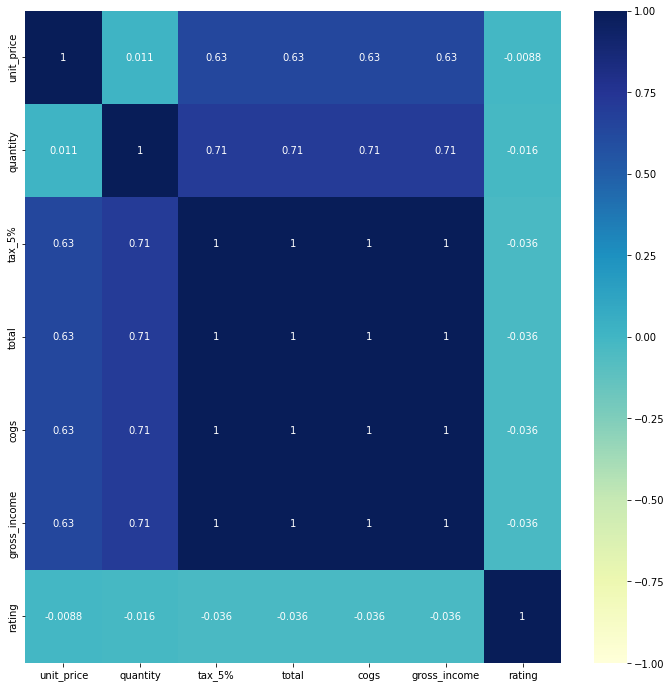

In [22]:
sns.heatmap(df_num.corr(),
            vmax = 1,
            vmin = -1,
            cmap = "YlGnBu",
           annot = True); 

4. Guardad la gráfica del heatmap.
